### Face and Facial Keypoint detection ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import torch
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
ruta_csvtraining = 'C:\\Users\\joker\\Desktop\\yep\\trabajo\\udacityCV\\CVND_Exercises\\PROJECT_1\\data\\training_frames_keypoints.csv'
ruta_training = 'C:\\Users\\joker\\Desktop\\yep\\trabajo\\udacityCV\\CVND_Exercises\\PROJECT_1\\data\\training\\'

ruta_csvtest = 'C:\\Users\\joker\\Desktop\\yep\\trabajo\\udacityCV\\CVND_Exercises\\PROJECT_1\\data\\test_frames_keypoints.csv'
ruta_test = 'C:\\Users\\joker\\Desktop\\yep\\trabajo\\udacityCV\\CVND_Exercises\\PROJECT_1\\data\\test\\'

ruta_imagenes = 'C:\\Users\\joker\\Desktop\\yep\\trabajo\\udacityCV\\CVND_Exercises\\PROJECT_1\\images\\obamas.jpg'
ruta_architectures = 'C:\\Users\\joker\\Desktop\\yep\\trabajo\\udacityCV\\CVND_Exercises\\PROJECT_1\\detector_architectures\\haarcascade_frontalface_default.xml'

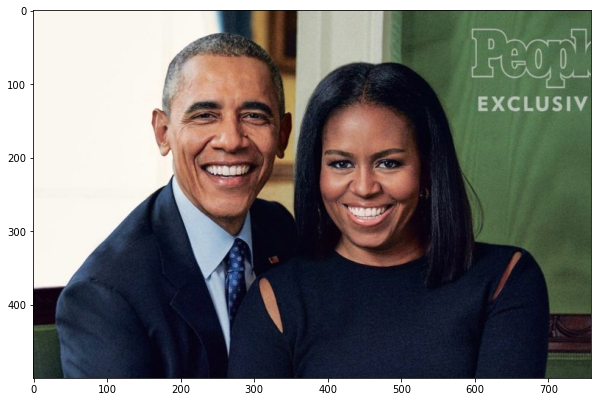

In [3]:
import cv2 

image = cv2.imread(ruta_imagenes)
if(image.shape[2] == 4):
    print('4 canales, borrando tercero')
    image = image[:,:,0:3]
    
image = cv2.cvtColor(image,  cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,10))
plt.imshow(image)

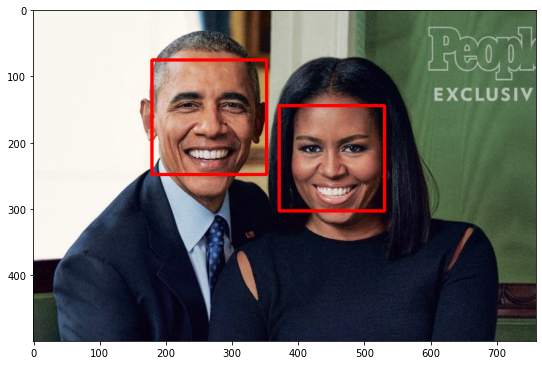

In [4]:
face_cascade = cv2.CascadeClassifier(ruta_architectures)

faces = face_cascade.detectMultiScale(image, 1.2, 2)

image_with_detections = image.copy()

for(x,y,w,h) in faces:
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3)
    
fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

### Loading in a trained model ###

In [5]:
from models import Net

model_dir = 'C:\\Users\\joker\\Desktop\\yep\\trabajo\\udacityCV\\CVND_Exercises\\PROJECT_1\\saved_models\\'
model_name = 'keypoints_model_5_2.pt'

net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv1drop): Dropout(p=0.1, inplace=False)
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv2drop): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv3drop): Dropout(p=0.3, inplace=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv4drop): Dropout(p=0.4, inplace=False)
  (conv5): Conv2d(512, 1024, kernel_size=(2, 2), stride=(1, 1))
  (conv5drop): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=25600, out_features=1500, bias=True)
  (fc1drop): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=1500, out_features=136, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [6]:
net.load_state_dict(torch.load(model_dir+model_name))
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv1drop): Dropout(p=0.1, inplace=False)
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv2drop): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv3drop): Dropout(p=0.3, inplace=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv4drop): Dropout(p=0.4, inplace=False)
  (conv5): Conv2d(512, 1024, kernel_size=(2, 2), stride=(1, 1))
  (conv5drop): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=25600, out_features=1500, bias=True)
  (fc1drop): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=1500, out_features=136, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [7]:
def show_all_keypoints(image, predicted_key_pts):
    """Show image with predicted keypoints"""
    plt.imshow(image,cmap='gray')
    predicted_key_pts = predicted_key_pts[0,:,:]
    plt.scatter(predicted_key_pts[:,0], predicted_key_pts[:,1], s=40, marker='.', c = 'm')

# visualize the output
# by default this shows a batch of 10 images
def visualize_output(image, outputs):

    plt.figure(figsize=(20,10))
    ax = plt.subplot(1, 1, 1)

    # un-transform the image data        
    image = image.cpu().numpy()   # convert to numpy array from a Tensor
    image = image[0,:,:,:]
    image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

    predicted_key_pts = outputs.cpu().detach().numpy()
    # undo normalization of keypoints  
    predicted_key_pts = predicted_key_pts*112+112

    # call show_all_keypoints
    show_all_keypoints(np.squeeze(image), predicted_key_pts)

    #plt.axis('off')

    plt.show()

In [8]:
from torchvision import transforms, utils

data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.Grayscale(),
    transforms.ToTensor()
])
assert(data_transform is not None), 'Define a data_transform'

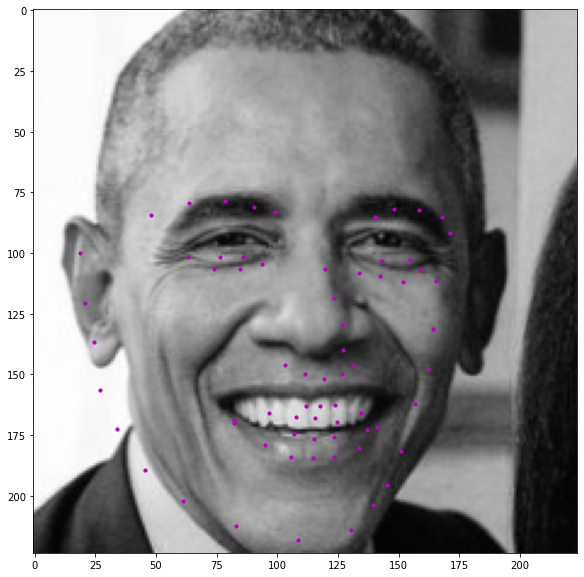

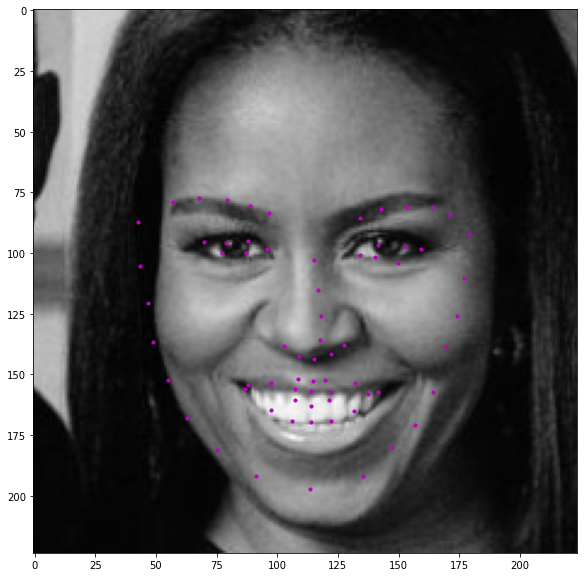

In [9]:
#roi_original = cv2.imread(ruta_imagenes)
#roi = cv2.cvtColor(roi_original,  cv2.COLOR_BGR2RGB)
#roi_transformed = data_transform(roi)
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    margin = 30
    image_copy = np.copy(image)
    roi = image_copy[(y-margin):(y+h+margin), (x-margin):(x+w+margin)]          

    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)       
    ## TODO: Convert the face region from RGB to grayscale        
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]              
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)   
    roi_transformed = data_transform(roi)
    roi_transformed = roi_transformed[None,:,:,:]
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network         
    output_pts = net(roi_transformed.to(device))
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)

    ## TODO: Display each detected face and the corresponding keypoints 
    visualize_output(roi_transformed, output_pts)